<a href="https://colab.research.google.com/github/ankursharma-kiwitech/final-project/blob/master/heart_diseases_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb

from scipy import stats

In [ ]:
dt = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

In [ ]:
dt.head()

In [ ]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [ ]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')


In [ ]:
dt['chest_pain_type'].value_counts()

In [ ]:
dt['rest_ecg'].value_counts()

In [ ]:
dt['st_slope'].value_counts()

In [ ]:
#dropping row with st_slope =0
dt.drop(dt[dt.st_slope ==0].index, inplace=True)
#checking distribution
dt['st_slope'].value_counts()

In [ ]:
# checking the top 5 entries of dataset after feature encoding
dt.head()

In [ ]:
## Checking missing entries in the dataset columnwise
dt.isna().sum()

In [ ]:
# first checking the shape of the dataset
dt.shape

In [ ]:
# summary statistics of numerical columns
dt.describe(include =[np.number])

In [ ]:
# summary statistics of categorical columns
dt.describe(include =[np.object])

In [ ]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

In [ ]:
# creating separate df for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()


In [ ]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


In [ ]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )


In [ ]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)


In [ ]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)


In [ ]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [ ]:
dt_numeric.head()


In [ ]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)


In [ ]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))


In [ ]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]


In [ ]:
# checking shape of dataset after outlier removal
dt.shape

In [ ]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()

In [ ]:
# checking the shape of dataset
dt.shape


In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

In [ ]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle= True , random_state=5)


In [ ]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

In [ ]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)


feature normalization
In this step we will normalize all the numeric feature in the range of 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

In [ ]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

In this step, we will build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used in level 0 of stacked ensemble method.

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import *
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  ,  LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [ ]:

models = GetBasedModel() 
names , results = BasedLine2 (X_train, y_train,  models)

In [ ]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

K nearest neighbour (n=9)

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

Extra Tree Classifier (n_estimators=500)

In [ ]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

XGBoost (n_estimators=500)

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

Support Vector Classifier (kernel='linear')

In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

Adaboost Classifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

decision Tree Classifier (CART)

In [ ]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)


gradient boosting machine

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

10. Model Evaluation
In this step we will first define which evaluation metrics we will use to evaluate our model. The most important evaluation metric for this problem domain is sensitivity, specificity, Precision, F1-measure, Geometric mean and mathew correlation coefficient and finally ROC AUC curve

Mathew Correlation coefficient (MCC)
The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.



Log Loss
Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high log loss.

The graph below shows the range of possible log loss values given a true observation (isDog = 1). As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predications that are confident and wrong!



F1 Score
F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 Score = 2(Recall Precision) / (Recall + Precision)

In [ ]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

Comparison with other Models

In [ ]:
data = {        'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et_100,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

Findings
AS we can see from above results, XGBoost Classifier is best performer as it has highest test accuracy of 0.9191, sensitivity of 0.943 and specificity of 0.89 and highest f1-score of 0.9243 and lowest Log Loss of 2079.

ROC AUC Curve

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

Precision Recall curve

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

11. Feature Selection

In [ ]:
num_feats=11

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

In [ ]:
# put all selection together
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target','resting_blood_pressure','sex_male','chest_pain_type_non-anginal pain','chest_pain_type_atypical angina'],axis=1)
y = dt['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

In [ ]:
X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

In [ ]:
import xgboost as xgb
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

Soft voting

In [ ]:
import xgboost as xgb
clf1=RandomForestClassifier(criterion='entropy',n_estimators=100)

clf2=DecisionTreeClassifier()
clf3=xgb.XGBClassifier(n_estimators= 1000)
clf4=ExtraTreesClassifier(n_estimators= 500)

clf5=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


eclf1 = VotingClassifier(estimators=[('rfe', clf1), ('decc', clf2), ('xgb', clf3),('ET',clf4),('gb',clf5),], 
                         voting='soft', weights=[4,1,2,3,1])
eclf1.fit(X_train,y_train)
y_pred_sv =eclf1.predict(X_test)

Model Evaluation

In [ ]:
CM=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

mathew = matthews_corrcoef(y_test, y_pred_sv)
model_results =pd.DataFrame([['Soft Voting',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [ ]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
et_1000 = ExtraTreesClassifier(n_estimators= 1000)
et_1000.fit(X_train,y_train)
y_pred_et1000 = et_1000.predict(X_test)
xgb = xgb.XGBClassifier(n_estimators= 1000)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)
data = {
             'Random Forest Entropy': y_pred_rfe, 
                'MLP2': y_pred_mlp, 
                'KNN2': y_pred_knn, 
                'EXtra tree classifier': y_pred_et1000,
                'XGB2': y_pred_xgb, 
                'SVC2': y_pred_svc, 
                'SGD2': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,eclf1.predict_proba(X_test),label='Soft Voting Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,eclf1.predict_proba(X_test),label='Soft voting classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

Feature Importance

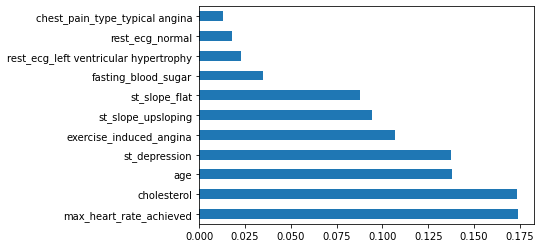

In [107]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')